# Keras TextVectorization + LSTM

https://www.tensorflow.org/text/tutorials/text_classification_rnn

In [10]:
from ipynb.fs.full.data_loader import load_train_test_data
from ipynb.fs.full.utils import plot_graphs, eval_keras
from ipynb.fs.full.transformers import DenseTransformer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.callbacks import History

from sklearn.pipeline import make_pipeline

import numpy as np
import matplotlib.pyplot as plt

---

In [11]:
train_X, test_X, train_y, test_y = load_train_test_data()

In [12]:
VOCAB_SIZE = 3242
encoder = TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(np.asarray(train_X))

In [13]:
def create_model():
    model = Sequential()
    
    model.add(encoder)
    model.add(Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=128,
        # Use masking to handle the variable sequence lengths
        mask_zero=True))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [14]:
clf = create_model()
history = clf.fit(train_X, train_y, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
36/36 [==============================] - 18s 178ms/step - loss: 0.6418 - accuracy: 0.5464 - val_loss: 0.2541 - val_accuracy: 0.9200
Epoch 2/5
36/36 [==============================] - 4s 98ms/step - loss: 0.2037 - accuracy: 0.9405 - val_loss: 0.1681 - val_accuracy: 0.9280
Epoch 3/5
36/36 [==============================] - 4s 99ms/step - loss: 0.0794 - accuracy: 0.9888 - val_loss: 0.2714 - val_accuracy: 0.9120
Epoch 4/5
36/36 [==============================] - 3s 97ms/step - loss: 0.0350 - accuracy: 0.9954 - val_loss: 0.3120 - val_accuracy: 0.9040
Epoch 5/5
36/36 [==============================] - 3s 90ms/step - loss: 0.0173 - accuracy: 0.9984 - val_loss: 0.3624 - val_accuracy: 0.9040


In [15]:
eval_keras(clf, test_X, test_y)

Test loss: 0.6193807125091553
Test accuracy: 0.8690096139907837


(0.0, 0.5815524284727871)

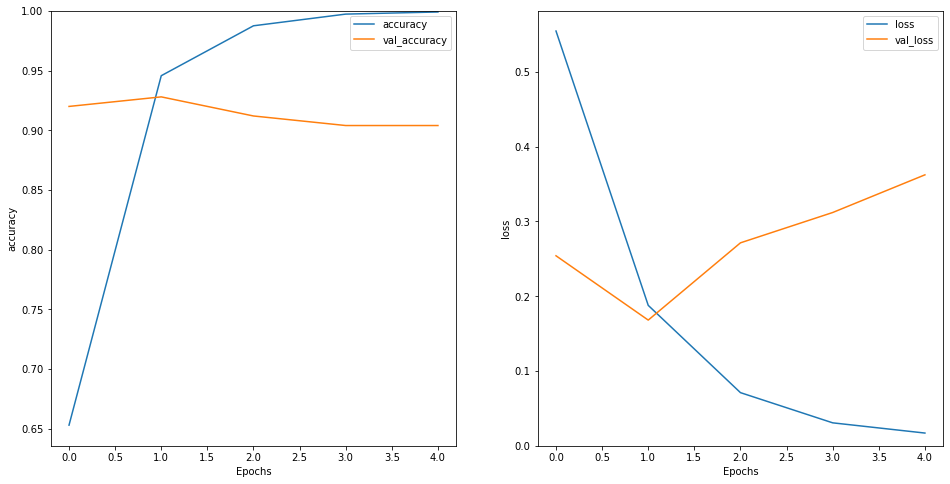

In [16]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)